Import of libraries and file .csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving HousingData.csv to HousingData (3).csv


Code to read the file

In [ ]:
import io

nome_do_arquivo = "HousingData (1).csv"
data = pd.read_csv(io.BytesIO(uploaded[nome_do_arquivo]))


Code to confirm that the file was loaded correctly

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


1.What is the shape of the dataset?

In [ ]:
print(f"Shape of the dataset: {data.shape}")


Shape of the dataset: (506, 14)


2.What are the data types of each feature?

In [ ]:
print(data.dtypes)


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


3.How many observations and features are in the dataset?

In [ ]:
n_observations, n_features = data.shape
print(f"Number of observations: {n_observations}")
print(f"Number of features: {n_features - 1}")  #excluding the target variable, in this case the MEDV, in order to distinguish feature from variable

Number of observations: 506
Number of features: 13


4.Are there any missing or null values in the dataset?


In [ ]:
null_values = data.isnull().sum()
print(null_values)


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In this case, yes, there are 6 null values, the way to know this is when they are numbers above 0 and there are ways to solve this problem, for example by eliminating the line, filling in with a frequent value or with the average.

5.What is the distribution of the target variable, i.e., the median house value?

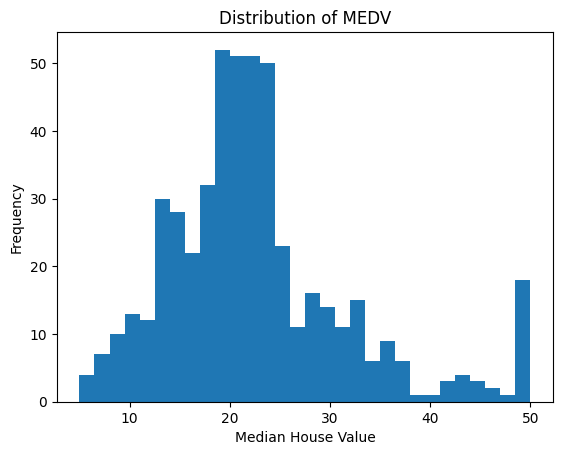

In [ ]:
plt.hist(data['MEDV'], bins=30)
plt.title('Distribution of MEDV')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


There are houses with very high values ​​that can be considered outliers


6.What is the range of values for each feature?

In [ ]:
ranges = data.describe().loc[['min', 'max']]
print(ranges)


         CRIM     ZN  INDUS  CHAS    NOX     RM    AGE      DIS   RAD    TAX  \
min   0.00632    0.0   0.46   0.0  0.385  3.561    2.9   1.1296   1.0  187.0   
max  88.97620  100.0  27.74   1.0  0.871  8.780  100.0  12.1265  24.0  711.0   

     PTRATIO       B  LSTAT  MEDV  
min     12.6    0.32   1.73   5.0  
max     22.0  396.90  37.97  50.0  


7.How are the different features correlated with each other?

In [ ]:
correlations = data.corr()
correlation_matrix = data.corr() #para calcular a matriz da correlação
print(correlations)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.191178  0.401863 -0.054355  0.417130 -0.219150  0.354342   
ZN      -0.191178  1.000000 -0.531871 -0.037229 -0.513704  0.320800 -0.563801   
INDUS    0.401863 -0.531871  1.000000  0.059859  0.764866 -0.390234  0.638431   
CHAS    -0.054355 -0.037229  0.059859  1.000000  0.075097  0.104885  0.078831   
NOX      0.417130 -0.513704  0.764866  0.075097  1.000000 -0.302188  0.731548   
RM      -0.219150  0.320800 -0.390234  0.104885 -0.302188  1.000000 -0.247337   
AGE      0.354342 -0.563801  0.638431  0.078831  0.731548 -0.247337  1.000000   
DIS     -0.374166  0.656739 -0.711709 -0.093971 -0.769230  0.205246 -0.744844   
RAD      0.624765 -0.310919  0.604533  0.001468  0.611441 -0.209847  0.458349   
TAX      0.580595 -0.312371  0.731055 -0.032304  0.668023 -0.292048  0.509114   
PTRATIO  0.281110 -0.414046  0.390954 -0.111304  0.188933 -0.355501  0.269226   
B       -0.381411  0.171303 

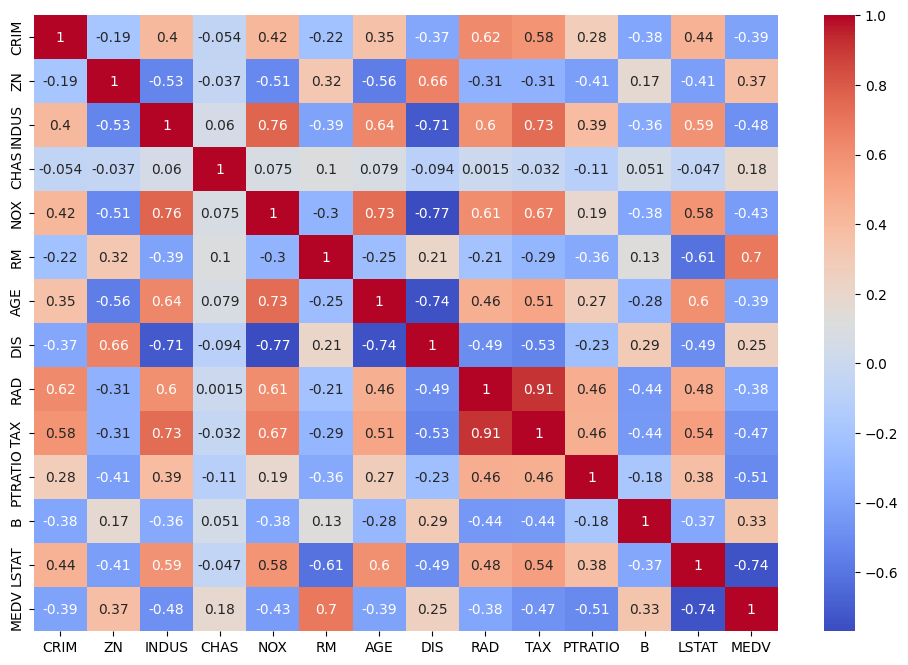

In [ ]:
#Visualize the matrix with a heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables show a strong negative correlation. Looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7), while LSTAT has a high negative correlation with MEDV (-0.74). An important point in selecting features for a linear regression model is checking for multicollinearity. The RAD, TAX characteristics have a correlation of 0.91. These feature pairs are strongly correlated with each other. The same goes for the DIS and AGE attributes which have a correlation of -0.75.


8.Are there any outliers in the dataset?

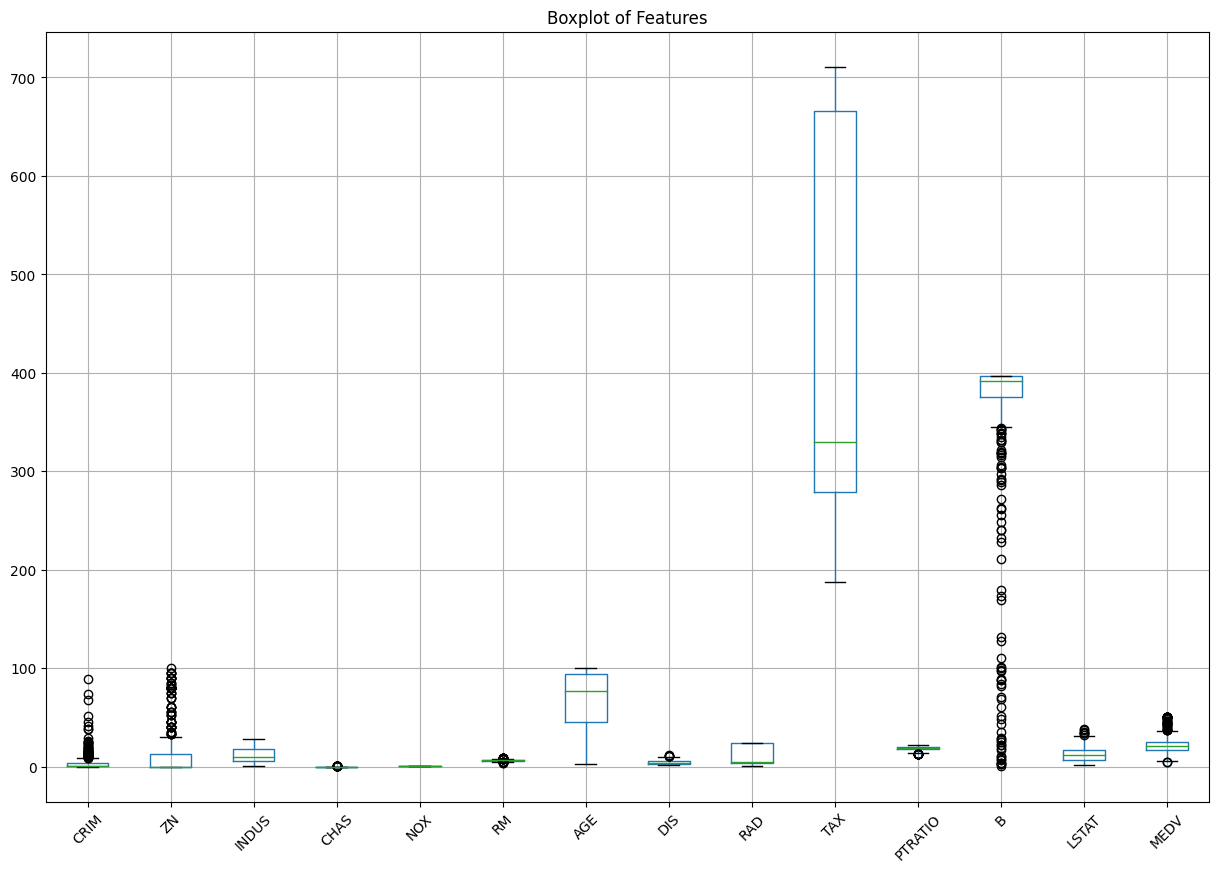

In [ ]:
data.boxplot(figsize=(15,10))
plt.xticks(rotation=45)
plt.title('Boxplot of Features')
plt.show()


The boxplot provides a quick and intuitive visualization of the data distribution, allowing you to easily identify and interpret outliers. It is effective as it not only shows the presence of outliers, but also indicates in which part of the spectrum they are and in this case we have some, the ones that stand out the most are CRIM, ZN and B.







9.What is the frequency distribution of each categorical feature (if any)?

In [ ]:
categorical_features = []

for feature in categorical_features:
    print(data[feature].value_counts())
    print("\n")


In [ ]:
print(data.dtypes)


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


From what I understand or conclude is that there is no categorical characteristic


10.Are there any patterns in the relationship between the median house value and the pupil-teacher ratio in the neighborhood?

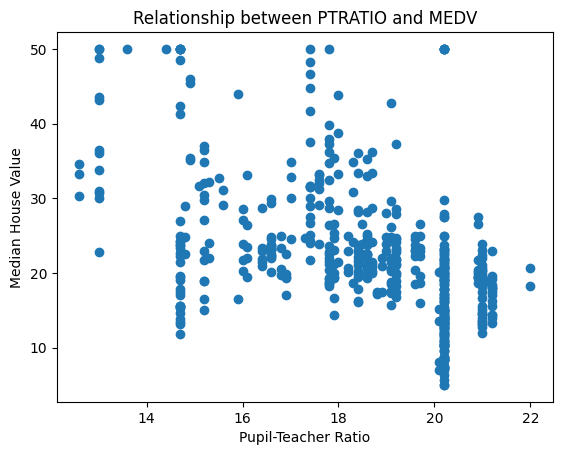

In [ ]:
plt.scatter(data['PTRATIO'], data['MEDV'])
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Median House Value')
plt.title('Relationship between PTRATIO and MEDV')
plt.show()

Scatter plot graph was used to visualize the relationship between two variables, PTRATIO in which it attempts to quantify the potential quality of education in a given area, and MEDV in which the value of houses in a given area can be influenced by several factors. After my observation of the graph, I think or appear to me that the relationship is negative, as areas with a higher student-teacher ratio tend to have lower median house values. Conversely, areas with a lower student-teacher ratio tend to have higher median home values.



11. Share any only other insight that you consider relevant.

In [ ]:
No, because of the challenge it was to accomplish everything else!


12.Fit a model to predict the median house value?

In [ ]:
X = X.fillna(X.mean())
Y = Y.fillna(Y.mean())

Treat missing data in the characteristic (X) and in the target variable (Y).
fillna() is a pandas function that fills NaN (missing) values ​​in a DataFrame. Machine learning models such as linear regression cannot be trained when there are NaN values ​​in the data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#boa prática para verificar as dimensões e confirmar que a divisão foi feita conforme o esperado e que temos a proporção certa de dados em cada conjunto


(404, 2)
(102, 2)
(404,)
(102,)


function train_test_split from the scikit-learn library to split the dataset into two subsets: one for training and one for testing.
We shared that when building machine learning models it is essential to have a separate set of data that the model has never seen to evaluate how well it is performing. Helps detect if the model is just memorizing training data.

In [ ]:
def evaluate_model(model, features, true_values): #evaluate_model serve para avaliar o desempenho de um modelo de regressão
    predictions = model.predict(features)
    rmse_val = np.sqrt(mean_squared_error(true_values, predictions))
    r2_val = r2_score(true_values, predictions)
    return rmse_val, r2_val


The idea behind this function is to encapsulate the evaluation logic in a single function. So, whenever we want to evaluate a model, we can simply call this function instead of rewriting the same code multiple times, and if we decide to add more metrics or change the way we evaluate the model in the future, we can make those changes in one place.

In [ ]:
# Avaliação para o conjunto de treino
train_rmse, train_r2 = evaluate_model(lin_model, X_train, Y_train)
print("The model performance for training set")
print("--------------------------------------")
print(f'RMSE is {train_rmse}')
print(f'R2 score is {train_r2}')
print("\n")

# Avaliação para o conjunto de teste
test_rmse, test_r2 = evaluate_model(lin_model, X_test, Y_test)
print("The model performance for testing set")
print("--------------------------------------")
print(f'RMSE is {test_rmse}')
print(f'R2 score is {test_r2}')


The model performance for training set
--------------------------------------
RMSE is 5.6130449732509105
R2 score is 0.6373311913469122


The model performance for testing set
--------------------------------------
RMSE is 5.616272784779241
R2 score is 0.5698773657416059


RMSE represents, on average, how much the model makes mistakes in its predictions. In the context of the Boston Housing dataset, an RMSE of approximately 5.61 suggests that, on average, the model's predictions are off by about $5,610 (since MEDV is represented in thousands of dollars). Having a similar RMSE for the training and testing set suggests that the model is generalizing well and is not overfitting to the training data.
R^2 (Coefficient of determination):
The R^2 value represents the proportion of variation in the dependent variable that is predictable from the independent variables. An R^2 value of 0.6373 for the training set indicates that the model explains about 63.73% of the variation in MEDV based on the given features. A slightly lower R^2 for the test set is expected and indicates that the model performs slightly worse on unseen data, which is normal. Still, an R^2 of 0.5699 on the test set indicates that the model explains about 56.99% of the variation in MEDV for the test data.
In short, the model has reasonable performance. Depending on the objective, it may be useful or it may be necessary to improve it further, however from the perspective and with the objective of an exploratory and learning analysis, I think this is a good starting point.
Ideally, a model should perform well on both sets. If a model performs very well on the training set but not so well on the test set, this could be a sign of "overfitting" (i.e., the model is too fit to the training data and does not generalize well to new data). On the other hand, if the model does not perform well even on the training set, it could be a sign of "underfitting" (the model is too simple and does not capture the complexity of the data).